In [45]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.cross_validation import train_test_split
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Reading the dataset

In [46]:
hcc = pd.read_csv("hcc-data.csv")

In [47]:
hcc.head(n=2)

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.1,0.7,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1


In [48]:
hcc.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'Hepatitis B Surface Antigen',
       'Hepatitis B e Antigen', 'Hepatitis B Core Antibody',
       'Hepatitis C Virus Antibody', 'Cirrhosis', 'Endemic Countries',
       'Smoking', 'Diabetes', 'Obesity', 'Hemochromatosis',
       'Arterial Hypertension', 'Chronic Renal Insufficiency',
       'Human Immunodeficiency Virus', 'Nonalcoholic Steatohepatitis',
       'Esophageal Varices', 'Splenomegaly', 'Portal Hypertension',
       'Portal Vein Thrombosis', 'Liver Metastasis', 'Radiological Hallmark',
       'Age_at_diagnosis', 'Grams of Alcohol per day',
       'Packs of cigarets per year', 'Performance Status',
       'Encefalopathy degree', 'Ascites degree',
       'International Normalised Ratio', 'Alpha-Fetoprotein', 'Haemoglobin',
       'Mean Corpuscular Volume', 'Leukocytes', 'Platelets', 'Albumin',
       'Total Bilirubin', 'Alanine transaminase', 'Aspartate transaminase',
       'Gamma glutamyl transferase', 'Alkaline phosphatase', 'Total P

In [49]:
for x in hcc.columns :
    if hcc['Class'].corr(hcc[x]) > 0.1:
        print(x," = ", hcc['Class'].corr(hcc[x]))

Endemic Countries  =  0.10940519193
Haemoglobin  =  0.292356655022
Albumin  =  0.28779855797
Iron  =  0.291405577687
Class  =  1.0


In [50]:
for x in hcc.columns :
    if hcc['Class'].corr(hcc[x]) < -0.2:
        print(x," = ", hcc['Class'].corr(hcc[x]))

Symptoms  =  -0.297034902498
Portal Vein Thrombosis  =  -0.213200716356
Liver Metastasis  =  -0.249259429522
Performance Status  =  -0.379708063423
Ascites degree  =  -0.261144514258
International Normalised Ratio  =  -0.202348110964
Total Bilirubin  =  -0.22396084388
Alkaline phosphatase  =  -0.293872646757
Direct Bilirubin  =  -0.264903101
Ferritin  =  -0.321489490236


# Handling the values for continuous attributes

In [51]:
continuous_x = hcc[['Symptoms','Ferritin','Portal Vein Thrombosis','Liver Metastasis','Performance Status','Ascites degree','International Normalised Ratio','Total Bilirubin','Alkaline phosphatase','Direct Bilirubin','Endemic Countries','Haemoglobin','Albumin','Iron']]

In [52]:
continuous_x.shape

(165, 14)

In [53]:
continuous_x.head()

,Symptoms,Ferritin,Portal Vein Thrombosis,Liver Metastasis,Performance Status,Ascites degree,International Normalised Ratio,Total Bilirubin,Alkaline phosphatase,Direct Bilirubin,Endemic Countries,Haemoglobin,Albumin,Iron
0,0.0,NaN,0.0,0.0,0,1.0,1.53,2.1,150.0,0.5,0.0,13.7,3.4,NaN
1,NaN,NaN,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,16.0,0.0,1.0,2,2.0,0.96,0.4,109.0,0.1,0.0,8.9,3.3,28.0
3,1.0,NaN,0.0,1.0,0,1.0,0.95,0.4,174.0,0.2,0.0,13.4,3.7,NaN
4,1.0,22.0,0.0,0.0,0,1.0,0.94,0.7,109.0,NaN,0.0,14.3,4.1,59.0


In [54]:
y_value = hcc.iloc[: , 49]

In [55]:
type(y_value)

pandas.core.series.Series

In [56]:
imputer = Imputer(missing_values = "NaN" ,strategy = 'mean', axis = 0)  

In [57]:
imputer = imputer.fit(continuous_x)

In [58]:
continuous_x = imputer.transform(continuous_x)

In [59]:
print(continuous_x)

[[   0.          438.99764706    0.         ...,   13.7           3.4
    85.59883721]
 [   0.63945578  438.99764706    0.         ...,   12.87901235
     3.44553459   85.59883721]
 [   0.           16.            0.         ...,    8.9           3.3          28.        ]
 ..., 
 [   0.          438.99764706    0.         ...,   13.3           4.3
    85.59883721]
 [   0.          438.99764706    1.         ...,   15.6           4.8
    85.59883721]
 [   1.          438.99764706    0.         ...,   12.7           2.2
    85.59883721]]


In [60]:
continuous_x = pd.DataFrame(data = continuous_x)

In [61]:
continuous_x = continuous_x.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [62]:
continuous_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.196860,0.0,0.0,0.0,0.0,0.173367,0.044776,0.151954,0.013699,0.000000,0.635036,0.500000,0.382138
1,0.639456,0.196860,0.0,0.0,0.0,0.0,0.146194,0.069352,0.215518,0.062671,0.079365,0.575110,0.515178,0.382138
2,0.000000,0.007175,0.0,1.0,0.5,0.5,0.030151,0.002488,0.110062,0.000000,0.000000,0.284672,0.466667,0.125000
3,1.000000,0.196860,0.0,1.0,0.0,0.0,0.027638,0.002488,0.176475,0.003425,0.000000,0.613139,0.600000,0.382138
4,1.000000,0.009865,0.0,0.0,0.0,0.0,0.025126,0.009950,0.110062,0.062671,0.000000,0.678832,0.733333,0.263393


In [63]:
#X_train, X_test, y_train, y_test = train_test_split(continuous_x,y_value,test_size=0.3, random_state=100)

In [64]:
#X_train.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

#continuous_x.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

#X_test.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [65]:
continuous_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.196860,0.0,0.0,0.0,0.0,0.173367,0.044776,0.151954,0.013699,0.000000,0.635036,0.500000,0.382138
1,0.639456,0.196860,0.0,0.0,0.0,0.0,0.146194,0.069352,0.215518,0.062671,0.079365,0.575110,0.515178,0.382138
2,0.000000,0.007175,0.0,1.0,0.5,0.5,0.030151,0.002488,0.110062,0.000000,0.000000,0.284672,0.466667,0.125000
3,1.000000,0.196860,0.0,1.0,0.0,0.0,0.027638,0.002488,0.176475,0.003425,0.000000,0.613139,0.600000,0.382138
4,1.000000,0.009865,0.0,0.0,0.0,0.0,0.025126,0.009950,0.110062,0.062671,0.000000,0.678832,0.733333,0.263393


# Handling the values for nominal values

In [66]:
nom_x = hcc.iloc[:,0:23]

In [67]:
nom_x.head()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Arterial Hypertension,Chronic Renal Insufficiency,Human Immunodeficiency Virus,Nonalcoholic Steatohepatitis,Esophageal Varices,Splenomegaly,Portal Hypertension,Portal Vein Thrombosis,Liver Metastasis,Radiological Hallmark
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
imputer = Imputer(missing_values = "NaN" ,strategy = 'most_frequent', axis = 0)  

In [69]:
imputer = imputer.fit(nom_x)

In [70]:
nom_x = imputer.transform(nom_x)

In [71]:
nom_x = pd.DataFrame(data = nom_x)

In [72]:
nom_x.columns = ['aa','ab','ac','ad','ae','af','ag','ah','ai','aj','ak','al','am','an','ao','ap','aq','ar','as','at','au','av','aw']

In [73]:
nom_x.head()

,aa,ab,ac,ad,ae,af,ag,ah,ai,aj,...,an,ao,ap,aq,ar,as,at,au,av,aw
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
frames = [nom_x,continuous_x]

In [75]:
#x_data = pd.concat(frames, axis=1)
x_data = continuous_x

In [76]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.196860,0.0,0.0,0.0,0.0,0.173367,0.044776,0.151954,0.013699,0.000000,0.635036,0.500000,0.382138
1,0.639456,0.196860,0.0,0.0,0.0,0.0,0.146194,0.069352,0.215518,0.062671,0.079365,0.575110,0.515178,0.382138
2,0.000000,0.007175,0.0,1.0,0.5,0.5,0.030151,0.002488,0.110062,0.000000,0.000000,0.284672,0.466667,0.125000
3,1.000000,0.196860,0.0,1.0,0.0,0.0,0.027638,0.002488,0.176475,0.003425,0.000000,0.613139,0.600000,0.382138
4,1.000000,0.009865,0.0,0.0,0.0,0.0,0.025126,0.009950,0.110062,0.062671,0.000000,0.678832,0.733333,0.263393


In [77]:
x_data.sample(frac = 1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
44,0.000000,0.196860,0.0,0.0,0.00,0.0,0.218593,0.047264,0.097801,0.013699,0.079365,0.773723,0.433333,0.382138
47,1.000000,0.398206,1.0,1.0,0.25,0.5,0.201005,0.161692,0.606629,0.136986,0.000000,0.656934,0.400000,0.281250
158,0.639456,0.196860,0.0,0.0,0.75,0.0,0.080402,0.000000,0.267410,0.062671,0.079365,0.233577,0.566667,0.382138
66,0.639456,0.176233,0.0,0.0,0.00,0.0,0.125628,0.027363,0.114149,0.006849,0.000000,0.773723,0.880000,0.419643
145,1.000000,0.196860,0.0,0.0,0.00,0.0,0.040201,0.011443,0.142758,0.007877,0.000000,0.306569,0.660000,0.382138


In [78]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_value,test_size=0.3, random_state=101)

In [79]:
#X_train.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

#x_data.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','aa','ab','ac','ad','ae','af','ag','ah','ai','aj','ak','al','am','an','ao','ap','aq','ar','as','at','au','av','aw']

#X_test.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [81]:
classifier = Sequential()
accuracy = 0

In [82]:
#for x in range(10):
classifier.add(Dense(output_dim = 1024, init = 'uniform', activation = 'relu', input_dim = 14))
classifier.add(Dense(output_dim = 512, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 256, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 128, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 
classifier.fit(X_train, y_train, batch_size = 20, nb_epoch = 100)

C:\Users\Debraj\AppData\Local\conda\conda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1024, input_dim=14, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Debraj\AppData\Local\conda\conda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=512)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Debraj\AppData\Local\conda\conda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=256)`
  after removing the cwd from sys.path.
C:\Users\Debraj\AppData\Local\conda\conda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Den

Epoch 1/100
115/115 [==============================] - 1s 6ms/step - loss: 0.6917 - acc: 0.6000
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.6752 - acc: 0.6000
Epoch 3/100
115/115 [==============================] - 0s 1ms/step - loss: 0.6246 - acc: 0.6000
Epoch 4/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5839 - acc: 0.6870
Epoch 5/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5762 - acc: 0.7304
Epoch 6/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5555 - acc: 0.7217
Epoch 7/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5263 - acc: 0.7391
Epoch 8/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5143 - acc: 0.7565
Epoch 9/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4967 - acc: 0.7565
Epoch 10/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4729 - acc: 0.7565
Epoch 11/100
115/115 [=================

115/115 [==============================] - 0s 1ms/step - loss: 8.1844e-05 - acc: 1.0000
Epoch 85/100
115/115 [==============================] - 0s 1ms/step - loss: 7.7311e-05 - acc: 1.0000
Epoch 86/100
115/115 [==============================] - 0s 1ms/step - loss: 7.1521e-05 - acc: 1.0000
Epoch 87/100
115/115 [==============================] - 0s 1ms/step - loss: 6.6145e-05 - acc: 1.0000
Epoch 88/100
115/115 [==============================] - 0s 1ms/step - loss: 6.1790e-05 - acc: 1.0000
Epoch 89/100
115/115 [==============================] - 0s 1ms/step - loss: 5.8024e-05 - acc: 1.0000
Epoch 90/100
115/115 [==============================] - 0s 1ms/step - loss: 5.3898e-05 - acc: 1.0000
Epoch 91/100
115/115 [==============================] - 0s 1ms/step - loss: 4.9600e-05 - acc: 1.0000
Epoch 92/100
115/115 [==============================] - 0s 1ms/step - loss: 4.5903e-05 - acc: 1.0000
Epoch 93/100
115/115 [==============================] - 0s 1ms/step - loss: 4.2607e-05 - acc: 1.0000
Epo

# Creating the confusion matrix


In [83]:
#accuracy/10

In [84]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  5]
 [ 7 26]]


In [85]:
acc = metrics.accuracy_score(y_test,y_pred)
pre = metrics.precision_score(y_test,y_pred)
rec = metrics.recall_score(y_test,y_pred)
f = metrics.f1_score(y_test,y_pred)
print("accuracy = ",acc)
print("precision = ",pre)
print("recall = ",rec)
print("F-Measure = ",f) 

accuracy =  0.76
precision =  0.838709677419
recall =  0.787878787879
F-Measure =  0.8125


In [86]:
y_pred = y_pred.astype(int)
y_test=np.asarray(y_test)

In [87]:
import matplotlib.pyplot as plt

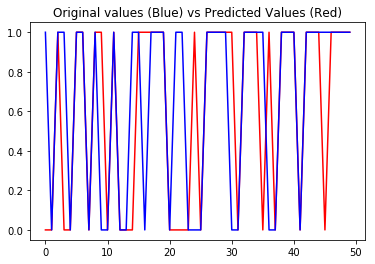

In [88]:
plt.plot(y_pred,'r')
plt.plot(y_test,'b')
plt.title("Original values (Blue) vs Predicted Values (Red)")
plt.show()